# SOMETHING ABOUT IRIS

In [15]:
import os
import numpy
import pandas
import seaborn
import simpsom
from matplotlib import pyplot

## INPUT PARAMETERS HERE

In [16]:
# DATA PARAMETERS
random_seed = 42
som_size = (6, 6)
lr = 0.01
max_epochs = 1000
file_name = 'iris.data'
var_types = {'petallength' : 'float',
             'petalwidth' : 'float',
             'sepallength' : 'float',
             'sepalwidth' : 'float',
             'flower' : 'str'}

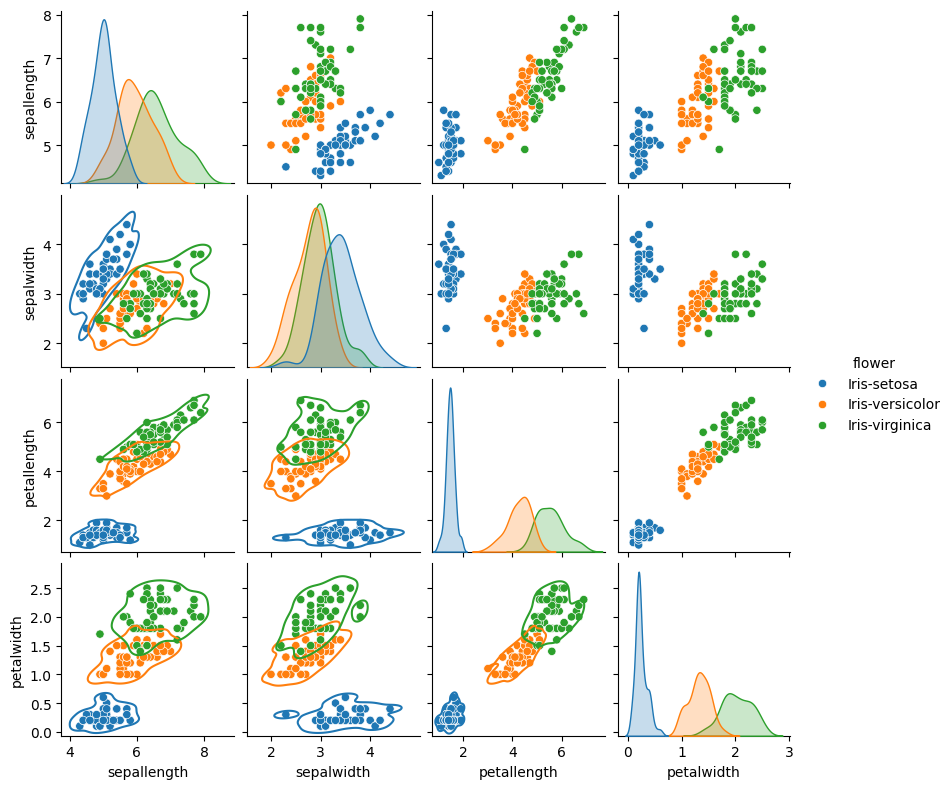

In [17]:
# IMPORT AND CONVERT
notebook_dir = os.getcwd()
root_dir = os.path.dirname(notebook_dir)
data_dir = os.path.join(root_dir, 'datasets')
iris_file = os.path.join(data_dir, file_name)
df = pandas.read_csv(iris_file)
for input_col in var_types.keys():
    df[input_col] = df[input_col].astype(var_types[input_col])


# SCATTER PLOT
g = seaborn.pairplot(df, hue='flower', height=2, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

## SOM COOKING

In [18]:
my_cols = ['petallength', 'petalwidth', 'sepallength', 'sepalwidth']
data = df[my_cols].to_numpy()
n_rows, n_columns = som_size
som = simpsom.SOMNet(n_rows, n_columns, data, random_seed=random_seed)
som.train(train_algo='batch', start_learning_rate=lr, epochs=max_epochs)

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


In [19]:
col_num = 0
print(my_cols[col_num])

petallength


In [20]:
print(my_cols)

['petallength', 'petalwidth', 'sepallength', 'sepalwidth']


petallength
petalwidth
sepallength
sepalwidth


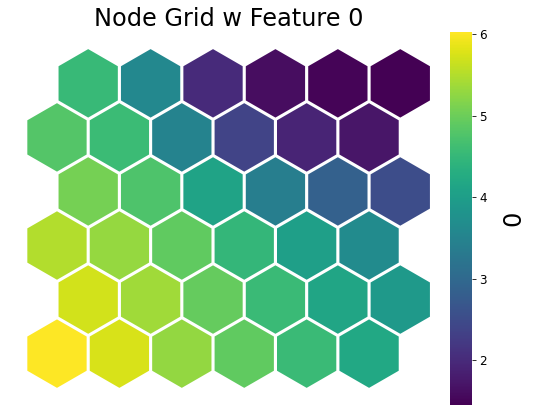

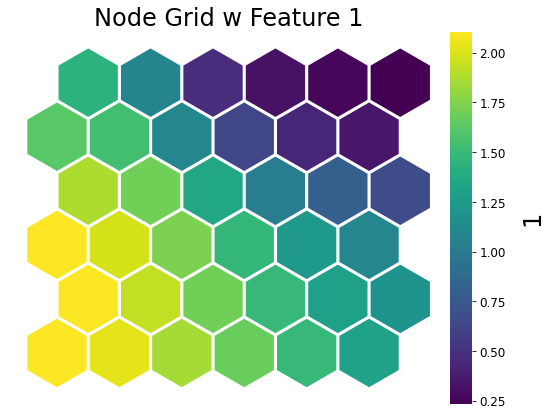

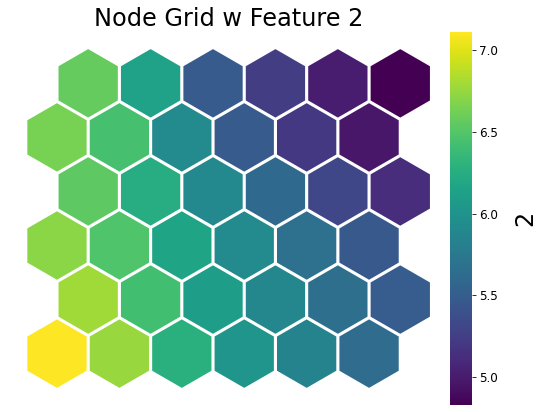

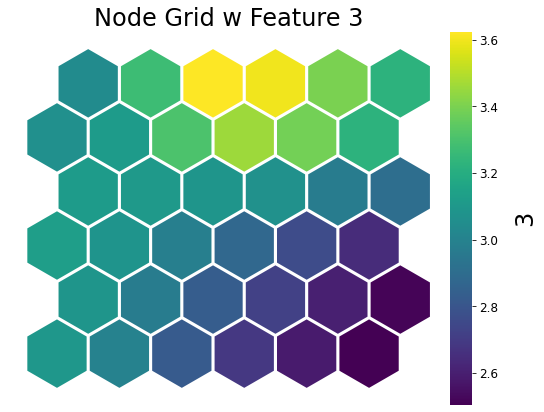

In [21]:
for num in numpy.arange(len(my_cols)):
    print(my_cols[num])
    som.nodes_graph(colnum=num)

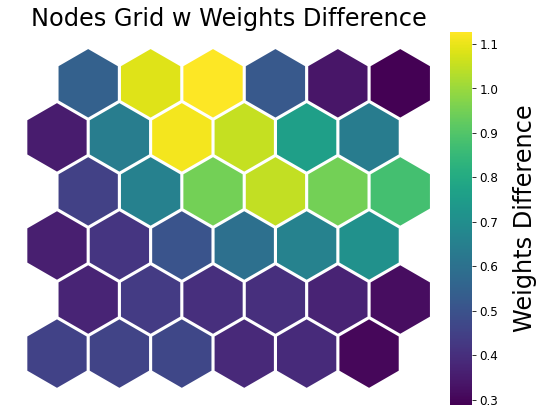

In [22]:
som.diff_graph()

In [23]:
my_classes = df.flower.value_counts().index.to_list()

my_classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Iris-setosa


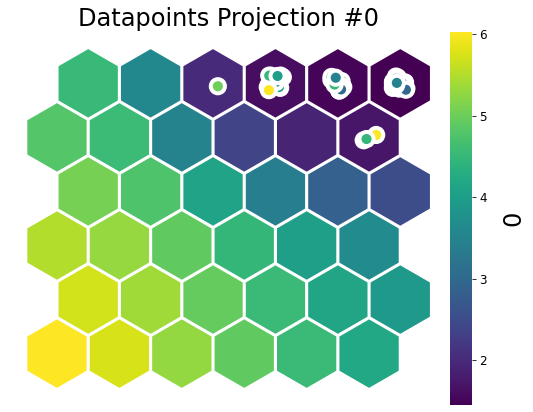

Iris-versicolor


<Figure size 640x480 with 0 Axes>

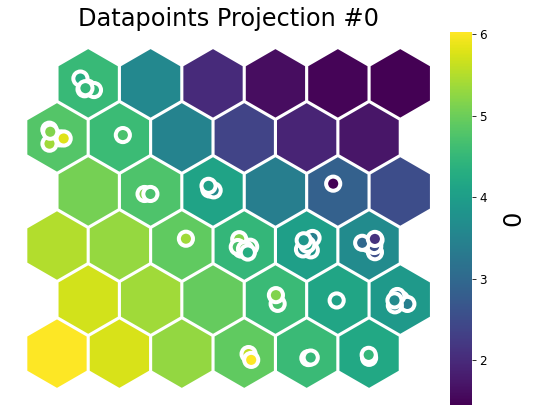

Iris-virginica


<Figure size 640x480 with 0 Axes>

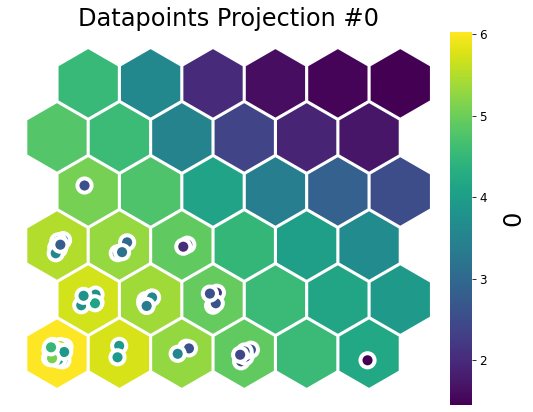

<Figure size 640x480 with 0 Axes>

In [24]:
for my_class in my_classes:
    print(my_class)
    som.project(data[df.flower==my_class, :],colnum=0, show=True)